In [3]:
import os
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import msgpack
import gzip
import pandas as pd
from collections import OrderedDict
import data_pb2
from tqdm import tqdm_notebook as tqdm
from datetime import datetime
import pytz
%matplotlib inline
import utils as sw_utils

data_root = os.path.join(os.environ['HOME'], 'vl/StopWatch/scripts/downloads')

In [204]:
tz = pytz.timezone('America/Los_Angeles')

for samples, filename in sorted(loaded, key=lambda (samples, _): samples.start_date):
    if isinstance(samples, data_pb2.ActivitySamples):
        assert len(samples.date) == len(samples.running), 'error with {}'.format(filename)
        st = datetime.utcfromtimestamp(samples.start_date).isoformat()
        print 'activity', st, 'count:', len(samples.date)
    else:
        #print samples.date
        if not samples.start_date:
            print 'error with this accel', filename, 'accel', samples.start_date, len(samples.date), len(samples.x), len(samples.y)
            continue
        assert len(samples.date) == len(samples.x), 'error with {}'.format(filename)
        st = datetime.utcfromtimestamp(samples.start_date).isoformat()
        end = datetime.utcfromtimestamp(samples.end_date).time().isoformat()
        print 'accel', os.path.basename(filename), st, end

accel p1602-s502-20170811T172217255Z.bin 2017-08-11T16:00:00 17:00:00
activity 2017-08-11T16:00:00 count: 228
activity 2017-08-11T16:21:02.312277 count: 1
accel p1602-s508-20170812T005924374Z.bin 2017-08-11T17:00:00 18:00:00
activity 2017-08-11T17:00:00 count: 125
accel p1602-s503-20170811T172228266Z.bin 2017-08-11T17:20:35.190344 17:20:40.190344
activity 2017-08-11T17:20:35.190344 count: 1
accel p1602-s509-20170812T005935437Z.bin 2017-08-11T18:00:00 19:00:00
activity 2017-08-11T18:00:00 count: 199
accel p1602-s510-20170812T005947269Z.bin 2017-08-11T19:00:00 20:00:00
activity 2017-08-11T19:00:00 count: 205
accel p1602-s511-20170812T005959452Z.bin 2017-08-11T20:00:00 21:00:00
activity 2017-08-11T20:00:00 count: 245
accel p1602-s512-20170812T010010615Z.bin 2017-08-11T21:00:00 22:00:00
activity 2017-08-11T21:00:00 count: 219
accel p1602-s514-20170812T010024011Z.bin 2017-08-11T22:00:00 23:00:00
activity 2017-08-11T22:00:00 count: 218
accel p1602-s513-20170812T010023846Z.bin 2017-08-11T23:0

activity 2017-08-16T12:00:00 count: 0
activity 2017-08-16T13:00:00 count: 0
activity 2017-08-16T14:00:00 count: 0
activity 2017-08-16T15:00:00 count: 0
activity 2017-08-16T16:00:00 count: 175
activity 2017-08-16T17:00:00 count: 214
activity 2017-08-16T18:00:00 count: 140
activity 2017-08-16T19:00:00 count: 237
activity 2017-08-16T20:00:00 count: 246
activity 2017-08-16T21:00:00 count: 255
activity 2017-08-16T22:00:00 count: 273
accel p1602-s675-20170817T221436209Z.bin 2017-08-16T23:00:00 00:00:00
activity 2017-08-16T23:00:00 count: 227
activity 2017-08-17T00:00:00 count: 251
accel p1602-s731-20170819T033402527Z.bin 2017-08-17T00:00:00 01:00:00
accel p1602-s773-20170819T033444552Z.bin 2017-08-17T00:00:00 01:00:00
accel p1602-s659-20170817T221435697Z.bin 2017-08-17T00:30:51.498149 00:30:56.498149
activity 2017-08-17T00:30:51.498149 count: 0
activity 2017-08-17T01:00:00 count: 276
activity 2017-08-17T02:00:00 count: 289
activity 2017-08-17T03:00:00 count: 230
accel p1602-s732-20170819T033

activity 2017-08-29T22:00:00 count: 196
activity 2017-08-29T23:00:00 count: 249
accel p1602-s1252-20170901T194330302Z.bin 2017-08-30T00:00:00 01:00:00
activity 2017-08-30T00:00:00 count: 128
activity 2017-08-30T01:00:00 count: 0
accel p1602-s1253-20170901T200555872Z.bin 2017-08-30T02:00:00 03:00:00
accel p1838-s2118-20171006T002652518Z.bin 2017-08-30T02:00:00 03:00:00
activity 2017-08-30T02:00:00 count: 4
activity 2017-08-30T03:00:00 count: 0
activity 2017-08-30T04:00:00 count: 0
activity 2017-08-30T05:00:00 count: 0
activity 2017-08-30T06:00:00 count: 0
activity 2017-08-30T07:00:00 count: 0
activity 2017-08-30T08:00:00 count: 0
activity 2017-08-30T09:00:00 count: 0
activity 2017-08-30T10:00:00 count: 0
activity 2017-08-30T11:00:00 count: 0
activity 2017-08-30T12:00:00 count: 0
activity 2017-08-30T13:00:00 count: 0
activity 2017-08-30T14:00:00 count: 0
activity 2017-08-30T15:00:00 count: 0
accel p1838-s2119-20171006T002652823Z.bin 2017-08-30T16:00:00 17:00:00
accel p1838-s2120-20171006

activity 2017-09-30T20:00:00 count: 1
activity 2017-09-30T21:00:00 count: 266
activity 2017-09-30T21:00:00 count: 266
activity 2017-09-30T21:00:00 count: 266
accel p1965-s2000-20171002T112415417Z.bin 2017-09-30T21:00:00 22:00:00
activity 2017-09-30T21:34:25.160488 count: 110
activity 2017-09-30T21:34:25.160488 count: 110
activity 2017-09-30T22:00:00 count: 252
accel p1965-s1849-20171001T005111921Z.bin 2017-09-30T22:00:00 23:00:00
activity 2017-09-30T22:00:00 count: 252
activity 2017-09-30T22:00:00 count: 252
accel p1965-s2004-20171002T222550070Z.bin 2017-09-30T22:00:00 23:00:00
activity 2017-09-30T23:00:00 count: 178
activity 2017-09-30T23:00:00 count: 178
activity 2017-09-30T23:00:00 count: 178
accel p1965-s2005-20171002T222552554Z.bin 2017-09-30T23:00:00 00:00:00
accel p1965-s2061-20171003T002345854Z.bin 2017-09-30T23:00:00 00:00:00
accel p1965-s2089-20171003T002827574Z.bin 2017-09-30T23:00:00 00:00:00
accel p1965-s1800-20171001T003220369Z.bin 2017-09-30T23:10:43.521912 23:12:43.5219

In [217]:
def _participant_from_file(fn):
    p = os.path.basename(fn).split('-')[0]
    assert p[0] == 'p', 'found unexpected ID {}'.format(p)
    return p

ranges_by_participant = {}

for samples, filename in sorted(loaded, key=lambda (samples, _): samples.start_date):
    participant = _participant_from_file(filename)
    ranges = ranges_by_participant.setdefault(participant, [])
    if isinstance(samples, data_pb2.AccelerometerSamples):
        st = _parse_date(samples.start_date)
        end = _parse_date(samples.end_date)
        if not ranges:
            ranges.append((st, end))
            continue
        r_st, r_end = ranges[-1]
        if st <= r_end:
            # if the current sample starts before or at the end of the current range
            # then we should extend the range
            ranges[-1] = (r_st, end)
        else:
            # otherwise, we should start a new range
            ranges.append((st, end))

from datetime import timedelta
for participant, ranges in ranges_by_participant.iteritems():
    total = timedelta()
    print 'participant', participant
    for st, end in ranges:
        st = st.replace(microsecond=0)
        total += end.replace(microsecond=0)-st
        print '\t', st.isoformat(), 'duration', end.replace(microsecond=0)-st
    print '\ttotal time', total

participant p1926
	2017-09-20T07:00:00-07:00 duration 1:00:00
	2017-09-20T09:00:00-07:00 duration 1:00:00
	2017-09-20T13:00:00-07:00 duration 1:00:00
	2017-09-20T15:00:00-07:00 duration 1:00:00
	2017-09-20T18:00:00-07:00 duration 1:00:00
	2017-09-21T00:00:00-07:00 duration 1:00:00
	2017-09-26T03:00:00-07:00 duration 5:00:00
	2017-09-27T02:00:00-07:00 duration 3:00:00
	total time 14:00:00
participant p1577
	2017-10-05T17:00:00-07:00 duration 3:00:00
	2017-10-06T10:00:00-07:00 duration 9:00:00
	total time 12:00:00
participant p1965
	2017-09-27T16:00:00-07:00 duration 2:00:00
	2017-09-27T19:00:00-07:00 duration 3:00:00
	2017-09-27T23:00:00-07:00 duration 3:00:00
	2017-09-28T10:00:00-07:00 duration 10:00:00
	2017-09-30T14:00:00-07:00 duration 2:12:43
	2017-09-30T16:26:10-07:00 duration 0:02:11
	2017-09-30T17:00:00-07:00 duration 0:36:18
	2017-09-30T17:46:39-07:00 duration 0:02:00
	2017-09-30T18:00:00-07:00 duration 10:00:00
	2017-10-01T05:00:00-07:00 duration 11:00:00
	2017-10-01T19:00:00-

In [4]:
class RollingAverage(object):
    # from https://www.quora.com/What-is-the-best-way-of-finding-mean-of-a-stream-at-any-point/answer/Mark-Harrison-2
    def __init__(self):
        self.reset()
    def reset(self):
        self.total = 0
        self.avg = 0.
    def update(self, item):
        self.total += 1
        self.avg += (item-self.avg)/self.total

def _get_still_ranges(x, y, z, thresh=None, minrangesize=None):
    # x, y, z should be of the same length
    results = []
    curr_st = 0
    xavg = RollingAverage()
    yavg = RollingAverage()
    zavg = RollingAverage()

    def _reset_group(idx):
        xavg.reset();xavg.update(x[idx])
        yavg.reset();yavg.update(y[idx])
        zavg.reset();zavg.update(z[idx])

    def _try_save_group(mismatch_idx):
        # we only try saving with indices that don't match, or are
        # out of bounds. So we don't want to include them in our length.
        curr_group_len = mismatch_idx-curr_st
        # we see if our group is longer than minrangesize to keep it.
        if curr_group_len >= minrangesize:
            results.append((curr_st, curr_group_len))

    _reset_group(0) # initialize state properly to first item.

    for idx in range(1, len(x)):
        # should we include this point in current?
        if (
            abs(x[idx]-xavg.avg)<thresh and
            abs(y[idx]-yavg.avg)<thresh and
            abs(z[idx]-zavg.avg)<thresh
        ):
            # since difference from average is within threshold, we keep this point.
            continue
        else:
            _try_save_group(idx)

            # we reset averages and start a new group.
            _reset_group(idx)
            curr_st = idx

    _try_save_group(idx+1)
    return results

fake_len = 20
y = z = np.zeros((fake_len, 1))
x = np.zeros((fake_len, 1))
x[10] = 10
x[11:] = 20

assert _get_still_ranges(x, y, z, thresh=5, minrangesize=2) == [(0, 10), (11, 9)]
assert _get_still_ranges(x, y, z, thresh=5, minrangesize=1) == [(0, 10), (10, 1), (11, 9)]
assert _get_still_ranges(x, y, z, thresh=50, minrangesize=1) == [(0, 20)]

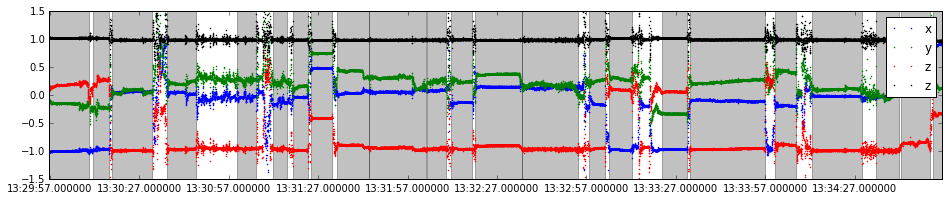

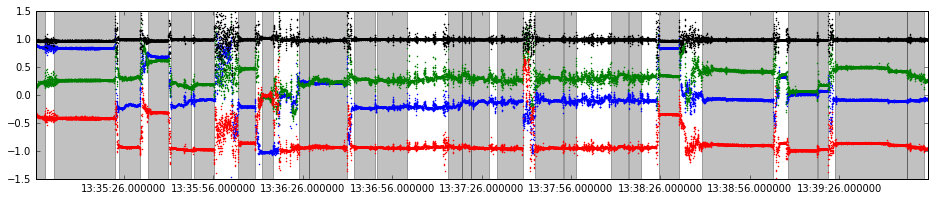

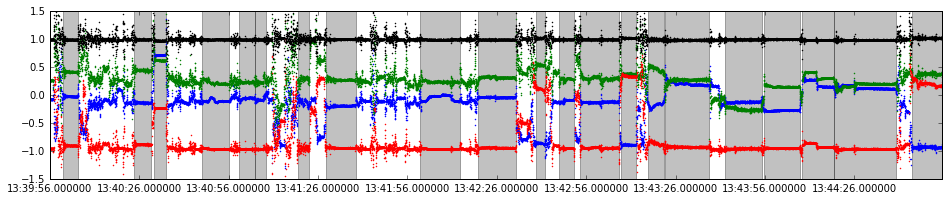

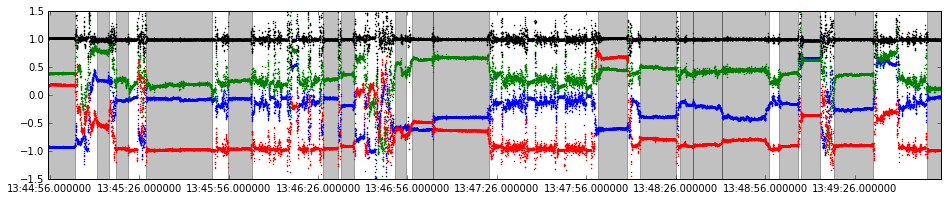

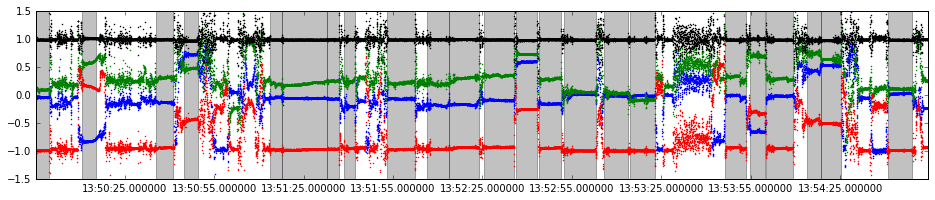

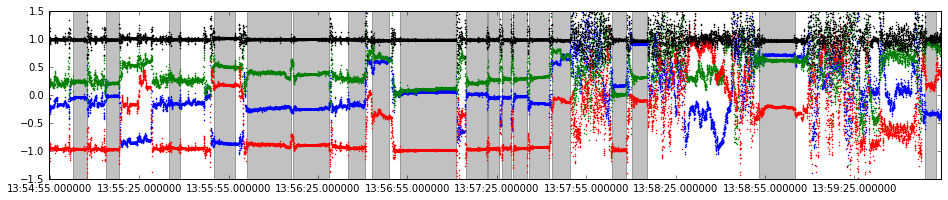

In [6]:
filename = 'p1602-s568-20170814T174407938Z.bin' # gre day
#filename = 'p1602-s1236-20170830T215223610Z.bin' # office day
data = sw_utils._load_data(os.path.join(data_root, filename))

second=50
minute = 60*second

begin = 30*minute
length = 5*minute

for idx in range(6):
    st = begin + length*idx
    end = st + length
    plt.figure(figsize=(16, 3))

    dates = [sw_utils._parse_date(d) for d in data.date[st:end]]
    plt.ylim([-1.5, 1.5])
    for key in ['x', 'y', 'z']:
        plt.plot_date(dates, getattr(data, key)[st:end], '.', markersize=2, label=key)
    force = np.sqrt(np.array(data.x[st:end]) ** 2 + np.array(data.y[st:end]) ** 2 + np.array(data.z[st:end]) ** 2)
    plt.plot_date(dates, force, 'k.', markersize=2, label=key)
    # Can play with threshold and minrange here.
    ranges = _get_still_ranges(
        data.x[st:end], data.y[st:end], data.z[st:end],
        #thresh=.2, minrangesize=second)
        thresh=.2, minrangesize=3*second)
    for still_range_st, still_range_len in ranges:
        plt.axvspan(
            dates[still_range_st], dates[still_range_st+still_range_len-1],
            facecolor='.2', alpha=0.3)
    if idx == 0:
        plt.legend()

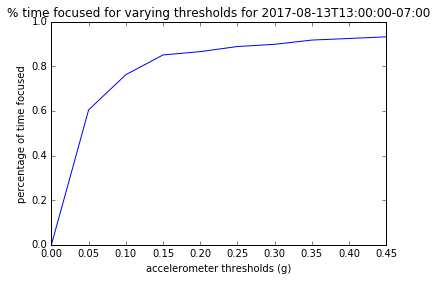

In [110]:
#data = _load_data(os.path.join(data_root, 'p1577-s2546-20171009T083122250Z.bin'))
#data = _load_data(os.path.join(data_root, 'p1965-s2001-20171002T112415611Z.bin'))
#data = _load_data(os.path.join(data_root, 'p1577-s2555-20171009T083122427Z.bin'))

threshs=[]
percents=[]

# all of it
st = 0 ; end = -1
# 5 minutes starting at 30
one_minute = 60 * 50
st = 5 * one_minute ; end = st + 5 * one_minute

d = dict(
    x=data.x[st:end],
    y=data.y[st:end],
    z=data.z[st:end],
)

for thresh in np.arange(0, .5, .05):
    threshs.append(thresh)

    ranges = _get_still_ranges(
        d['x'], d['y'], d['z'],
        thresh=thresh, minrangesize=3*second)
    still_total = sum(length for _, length in ranges)

    percents.append(still_total/float(len(d['x'])))

_=plt.plot(threshs, percents)
_=plt.title('% time focused for varying thresholds for {}'.format(_parse_date(data.start_date).isoformat()))
_=plt.xlabel('accelerometer thresholds (g)')
_=plt.ylabel('percentage of time focused')

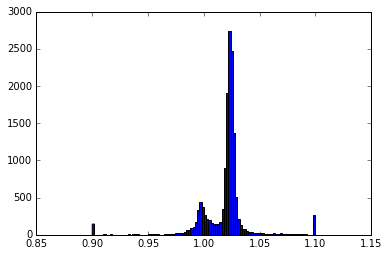

In [113]:
vector_lengths = np.sqrt(np.array(d['x']) ** 2 + np.array(d['y']) ** 2 + np.array(d['z']) ** 2)
vector_lengths = np.clip(vector_lengths, .9, 1.1)
_=plt.hist(vector_lengths, bins=100)